# Scikit_Learn 맛보기
### Iris 분류 - 결정 트리, 서포트벡터머신(SVM), 로지스틱 회귀

#### 1. 데이터 전처리

In [51]:
from sklearn.datasets import load_iris
iris = load_iris()

In [52]:
type(iris)

sklearn.utils.Bunch

In [53]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [54]:
# Feature.data - numpy dimemsional array
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [55]:
type(iris.data), iris.data.shape

(numpy.ndarray, (150, 4))

In [56]:
# Feature name : X
iris.feature_names



['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [57]:
# 자료구조, 함수, 딕셔너리, 리스트, 튜플, 함수 등 편하게 쓸 수 있을 정도 되면 lv2
# 뒷 쪽에 있는 cm 없애는 법 / map과 lambda 함수
iris_feature_names = list(map(lambda s: s[:-5], iris.feature_names))
iris_feature_names

['sepal length', 'sepal width', 'petal length', 'petal width']

In [58]:

feature_names =[]
for name in iris.feature_names:
    feature_names.append(name[:-5])

feature_names

['sepal length', 'sepal width', 'petal length', 'petal width']

In [59]:
# 리스트 표현식 (List comprehension)
feature_names = [name[:-5] for name in iris.feature_names]
feature_names

['sepal length', 'sepal width', 'petal length', 'petal width']

In [98]:
# 무슨의미지???‼️💜
# features_names = iris.feature_names.split()[-5]
# features_names

In [62]:
# Target data : Y
iris.target[:5]

array([0, 0, 0, 0, 0])

In [63]:
import numpy as np
np.unique(iris.target, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

In [64]:
import pandas as pd
df = pd.DataFrame(iris.data, columns = iris.feature_names)
# 데이터에는 2차원 데이터가 들어오고 target에는 Y 값이 들어간거.
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [65]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [66]:
# 데이터에 대한 설명
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [67]:
df.groupby('target').describe()

sepal length (cm)                                              \
                   count   mean       std  min    25%  50%  75%  max   
target                                                                 
0                   50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
1                   50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
2                   50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

       sepal width (cm)         ... petal length (cm)      petal width (cm)  \
                  count   mean  ...               75%  max            count   
target                          ...                                           
0                  50.0  3.428  ...             1.575  1.9             50.0   
1                  50.0  2.770  ...             4.600  5.1             50.0   
2                  50.0  2.974  ...             5.875  6.9             50.0   

                                                  
         mean       std  min  25%  50%  75%  max  
target                                            
0       0.246  0.105386  0.1  0.2  0.2  0.3  0.6  
1       1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
2       2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [68]:
df.groupby('target').agg(['mean', 'std'])

sepal length (cm)           sepal width (cm)            \
                    mean       std             mean       std   
target                                                          
0                  5.006  0.352490            3.428  0.379064   
1                  5.936  0.516171            2.770  0.313798   
2                  6.588  0.635880            2.974  0.322497   

       petal length (cm)           petal width (cm)            
                    mean       std             mean       std  
target                                                         
0                  1.462  0.173664            0.246  0.105386  
1                  4.260  0.469911            1.326  0.197753  
2                  5.552  0.551895            2.026  0.274650

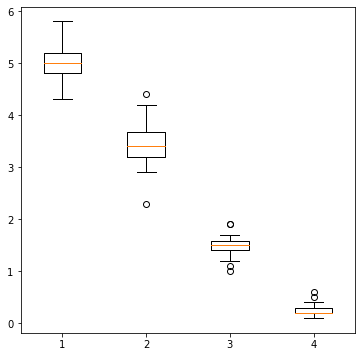

In [69]:
import matplotlib.pyplot as plt
setosa = df[df.target==0].iloc[:,:-1]
plt.figure(figsize=(6,6))
plt.boxplot(setosa)
plt.show()

#### 2. 학습과 테스트 데이터로 분리

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    # 행 120개 열 4개인 2차원 데이터.. 2차원 이상은 대문자/ 1차원 데이터는 소문자로 표현
    # de facto standard 라고 함..
    iris.data, iris.target, test_size= 0.2, random_state= 2021
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [71]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([36, 40, 44]))

In [72]:
# y 값을 균일하게 뽑으려면 stratify 옵션을 설정해주어야 함.
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify = iris.target, test_size = 0.2, random_state=2021
)
np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([40, 40, 40]))

In [73]:
np.random.seed(2021)
np.random.randint(0,101,10)

array([85, 57,  0, 94, 86, 44, 62, 91, 29, 21])

#### 3. 학습
- Decision Tree(결정 트리)

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
# 모델 생성 - 객체 생성
dtc = DecisionTreeClassifier(random_state = 2021)


In [76]:
# 하이퍼 파라미터
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 2021,
 'splitter': 'best'}

In [77]:
# 학습 (훈련)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2021)

#### 4. 예측

In [78]:
pred_dt = dtc.predict(X_test)

In [79]:
pred_dt

array([0, 1, 2, 2, 0, 1, 0, 1, 2, 0, 1, 1, 1, 2, 1, 0, 2, 0, 2, 0, 1, 2,
       0, 2, 1, 0, 1, 1, 2, 0])

In [80]:
res = pd.DataFrame({'y': y_test, 'DT': pred_dt})
res.head()

,y,DT
0,0,0
1,1,1
2,1,2
3,2,2
4,0,0


#### 5. 평가

In [81]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred_dt) # 순서 바뀌면 안됨
print(f'정확도(DT): {acc: 4f}') # 4f의 의미: 

정확도(DT):  0.900000


In [82]:
# 4, 5번을 한꺼번에 수행
dtc.score(X_test, y_test)

0.9

#### n. 참고사항 f-string

In [83]:
a = 1
b = 1.0
c = "문자열"
print(a,b,c)

1 1.0 문자열


In [84]:
print('정수:', a, ', 실수:',b, ',', c, '"1"')

정수: 1 , 실수: 1.0 , 문자열 "1"


In [85]:
print(f'정수: {a}, 실수: {b}, {c}: "1"')

정수: 1, 실수: 1.0, 문자열: "1"


In [86]:
print(f'정수: {a:03d}, 실수: {b:2f}, {c}: "1"')

정수: 001, 실수: 1.000000, 문자열: "1"


- Support Vector Machine(SVM)

In [87]:
# 3)
from sklearn.svm import SVC
svc = SVC(random_state=2021)
svc.fit(X_train,y_train)

SVC(random_state=2021)

In [88]:
# 4) 예측
pred_sv = svc.predict(X_test)

In [90]:
# 5) 평가
accuracy_score(y_test, pred_sv), svc.score(X_test, y_test)

(0.9, 0.9)

- logistic Regression

In [92]:
# 3) 모델 생성 및 학습
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(max_iter=500, random_state=2021)
lrc.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=2021)

In [95]:
# 4) 예측
pred_lr = lrc.predict(X_test)

In [96]:
# 5) 평가
accuracy_score(y_test, pred_lr), lrc.score(X_test, y_test)

(0.9333333333333333, 0.9333333333333333)

- 3가지 모델 결과 비교

In [97]:
res['SV'] = pred_sv
res['LR'] = pred_lr
res.head(10)

,y,DT,SV,LR
0,0,0,0,0
1,1,1,1,1
2,1,2,1,1
3,2,2,2,2
4,0,0,0,0
5,1,1,1,1
6,0,0,0,0
7,1,1,1,1
8,2,2,2,2
9,0,0,0,0
